In [1]:
#Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#GPU 
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
#Data load
import numpy as np
import pandas as pd

X_train = np.load('/content/drive/MyDrive/딥러닝 AI+X/train_x.npy')
Y_train = np.load('/content/drive/MyDrive/딥러닝 AI+X/train_y.npy')
X_test = np.load('/content/drive/MyDrive/딥러닝 AI+X/test_x.npy')
Y_test  = pd.read_csv("/content/drive/MyDrive/딥러닝 AI+X/submission.csv").values
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(7494, 128, 6)
(7494, 9)
(3217, 128, 6)
(3217, 2)


In [4]:
#Model Library
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D,BatchNormalization
from keras.callbacks import EarlyStopping, LambdaCallback
from keras.layers import Activation, Dropout,Input, Flatten, Dense


In [13]:
#Convolutional Layer
model = Sequential()
model.add(Conv1D(32, kernel_size=3, input_shape=(128, 6),padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(Dense(32, activation='relu'))


model.add(Conv1D(64, kernel_size=3))
model.add(BatchNormalization(axis=-1))
model.add(Dense(64, activation='relu'))
model.add(MaxPooling1D(pool_size=3))

model.add(Conv1D(128, kernel_size=3))
model.add(BatchNormalization(axis=-1))
model.add(Dense(128, activation='relu'))


model.add(Conv1D(256, kernel_size=3))
model.add(BatchNormalization(axis=-1))
model.add(Dense(256, activation='relu'))


model.add(Conv1D(512, kernel_size=3))
model.add(BatchNormalization(axis=-1))
model.add(Dense(512, activation='relu'))


model.add(Conv1D(1024, kernel_size=3))
model.add(BatchNormalization(axis=-1))
model.add(Dense(1024, activation='relu'))

model.add(Conv1D(2048, kernel_size=3))
model.add(BatchNormalization(axis=-1))
model.add(Dense(2048, activation='relu'))

In [14]:
#Output Layer
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.4))
model.add(BatchNormalization(axis=-1))
model.add(Dense(9, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 128, 32)           608       
_________________________________________________________________
batch_normalization_20 (Batc (None, 128, 32)           128       
_________________________________________________________________
dense_20 (Dense)             (None, 128, 32)           1056      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 126, 64)           6208      
_________________________________________________________________
batch_normalization_21 (Batc (None, 126, 64)           256       
_________________________________________________________________
dense_21 (Dense)             (None, 126, 64)           4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 42, 64)           

In [ ]:
#만약 overfitting, underfitting 을 일으키면 EarlyStopping을 쓰기 위한 코드
#patience가 5면 validation score가 5회 이상 개선이 없을때 훈련을 멈춘다

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.005)

In [16]:
#model traing
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #rmsprop or adam , accuracy or f1-score  (positive와 negative의 데이터 값 차이가 높을 경우)
history = model.fit(X_train,Y_train, epochs=100, batch_size=20) #callbacks=[es])

Epoch 1/100
375/375 [==============================] - 64s 42ms/step - loss: 0.8524 - accuracy: 0.7577
Epoch 2/100
375/375 [==============================] - 15s 41ms/step - loss: 0.2602 - accuracy: 0.9034
Epoch 3/100
375/375 [==============================] - 15s 41ms/step - loss: 0.2319 - accuracy: 0.9102
Epoch 4/100
375/375 [==============================] - 16s 42ms/step - loss: 0.2016 - accuracy: 0.9230
Epoch 5/100
375/375 [==============================] - 16s 42ms/step - loss: 0.1577 - accuracy: 0.9369
Epoch 6/100
375/375 [==============================] - 16s 42ms/step - loss: 0.1578 - accuracy: 0.9332
Epoch 7/100
375/375 [==============================] - 16s 42ms/step - loss: 0.1546 - accuracy: 0.9355
Epoch 8/100
375/375 [==============================] - 16s 43ms/step - loss: 0.1308 - accuracy: 0.9465
Epoch 9/100
375/375 [==============================] - 16s 43ms/step - loss: 0.1260 - accuracy: 0.9483
Epoch 10/100
375/375 [==============================] - 16s 43ms/step - l

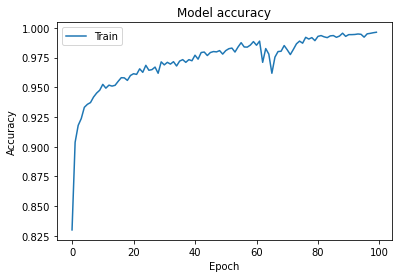

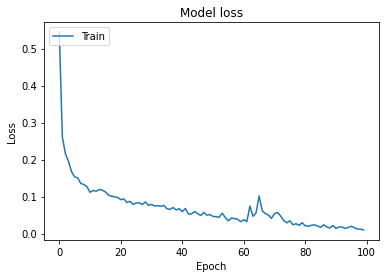

In [17]:
#훈련 및 검증 정확도 시각화
#학습 정확성 값과 검증 정확성 값
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()


In [18]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
preds

array([4, 1, 4, ..., 2, 0, 2])

In [19]:
#model save
submission = pd.read_csv('/content/drive/MyDrive/딥러닝 AI+X/submission.csv')
submission['Predicted Label'] = preds
submission.to_csv('submission_file.csv', index=False)
submission

,Trial,Predicted Label
0,0,4
1,1,1
2,2,4
3,3,0
4,4,0
...,...,...
3212,3212,5
3213,3213,1
3214,3214,2
3215,3215,0
